## __***2. Perform EDA on Text, Image & Numerical Data***__

### __***EDA on Text***__

#### __***Libraries***__

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import string
import re
import nltk
from nltk import tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
from tqdm import trange
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

#### __***Downloading nltk modules & Configuring pyplot parameters***__

In [2]:
nltk.download('omw-1.4', quiet=True)
nltk.download('punkt_tab')
nltk.download('stopwords')

sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (17,7)
plt.rcParams['font.size'] = 18

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\sugan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sugan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### __***Loading data***__

In [3]:
df = pd.read_csv('data/tripadvisor_hotel_reviews.csv')
print("Shape:",df.shape)
df.head()

Shape: (20491, 2)


Review  Rating
0  nice hotel expensive parking got good deal sta...       4
1  ok nothing special charge diamond member hilto...       2
2  nice rooms not 4* experience hotel monaco seat...       3
3  unique, great stay, wonderful time hotel monac...       5
4  great stay great stay, went seahawk game aweso...       5

#### __***Value count of Rating***__

<Axes: xlabel='Rating', ylabel='count'>

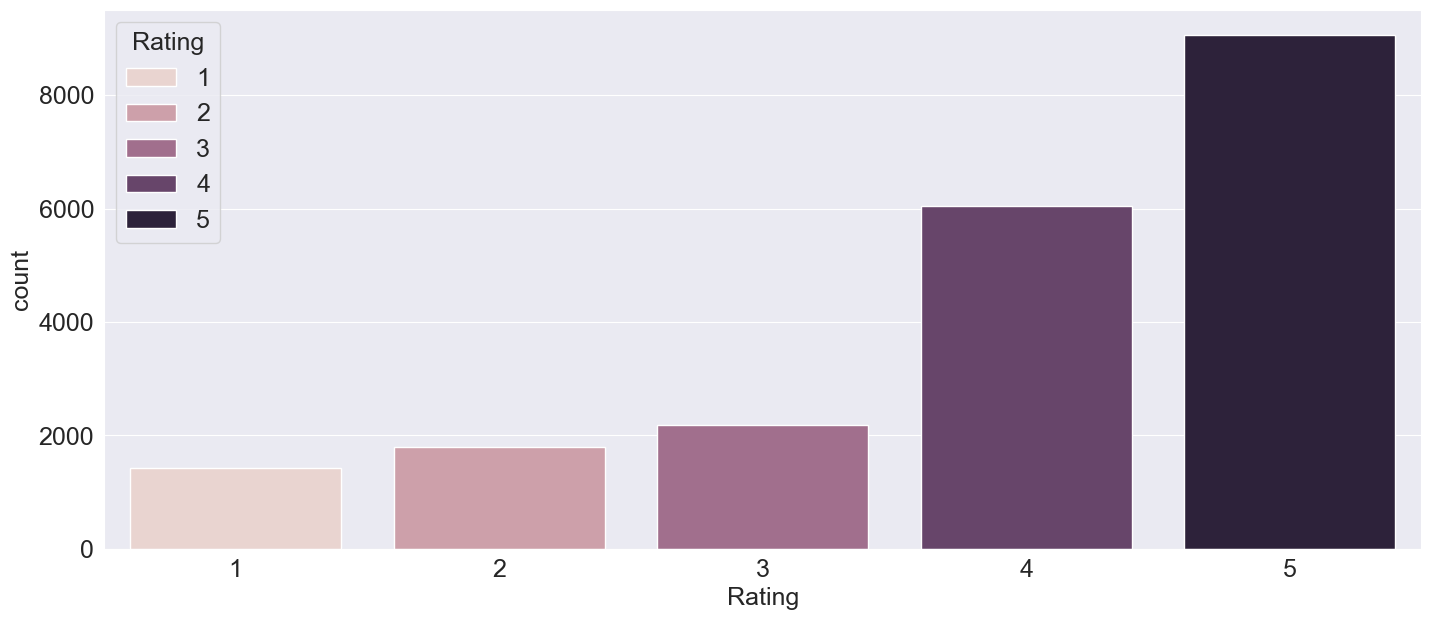

In [4]:
df['Rating'].value_counts()
sns.countplot(df, x='Rating', hue='Rating')

#### __***Extracting Word count, Mean word length, Mean sentence length***__

In [5]:
display(df.head())

df['Rating'] = (df['Rating'] > 3).map({True: "Positive", False: "Negative"})
df['Length'] = df['Review'].str.len()
df['Word_count'] = df['Review'].str.split().str.len()
df['Mean_word_length'] = df['Review'].apply(lambda text: np.mean([len(w) for w in text.split()]))
df['Mean_sent_length'] = df['Review'].apply(lambda text: np.mean([len(s) for s in tokenize.sent_tokenize(text)]))

display(df.head())

Review  Rating
0  nice hotel expensive parking got good deal sta...       4
1  ok nothing special charge diamond member hilto...       2
2  nice rooms not 4* experience hotel monaco seat...       3
3  unique, great stay, wonderful time hotel monac...       5
4  great stay great stay, went seahawk game aweso...       5

Review    Rating  Length  \
0  nice hotel expensive parking got good deal sta...  Positive     593   
1  ok nothing special charge diamond member hilto...  Negative    1689   
2  nice rooms not 4* experience hotel monaco seat...  Negative    1427   
3  unique, great stay, wonderful time hotel monac...  Positive     600   
4  great stay great stay, went seahawk game aweso...  Positive    1281   

   Word_count  Mean_word_length  Mean_sent_length  
0          87          5.804598             591.0  
1         250          5.752000            1687.0  
2         217          5.571429             712.0  
3          89          5.730337             598.0  
4         191          5.701571            1279.0

#### __***Box plot & Kernel Density Estimation (KDE - used to visualize probability density distribution of continous variable) plot***__

In [6]:
def visualize(df, col):
    plt.subplot(1,2,1)
    sns.boxplot(y=df[col], x=df['Rating'], hue=df['Rating'])
    plt.ylabel(col, labelpad=12.5)

    plt.subplot(1,2,2)
    sns.kdeplot(x=df[col], hue=df['Rating'])
    plt.legend(df['Rating'].unique())
    plt.xlabel('')
    plt.ylabel('')
    plt.show()

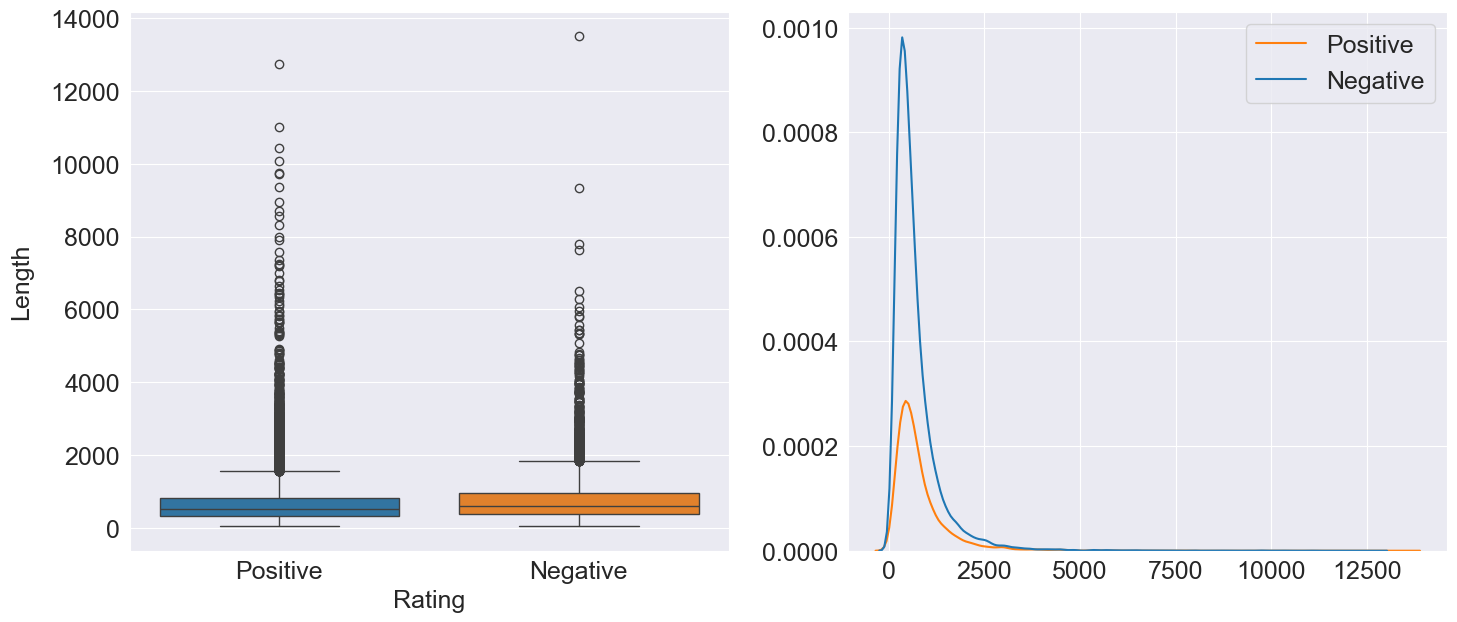

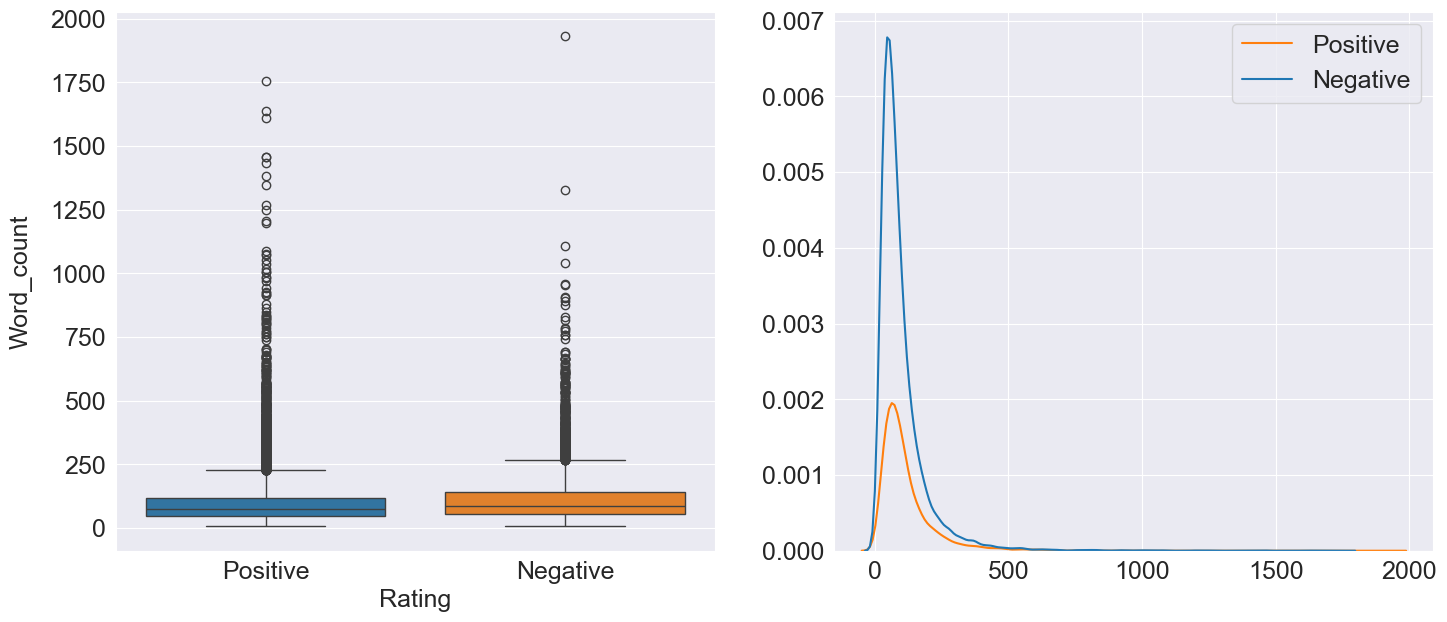

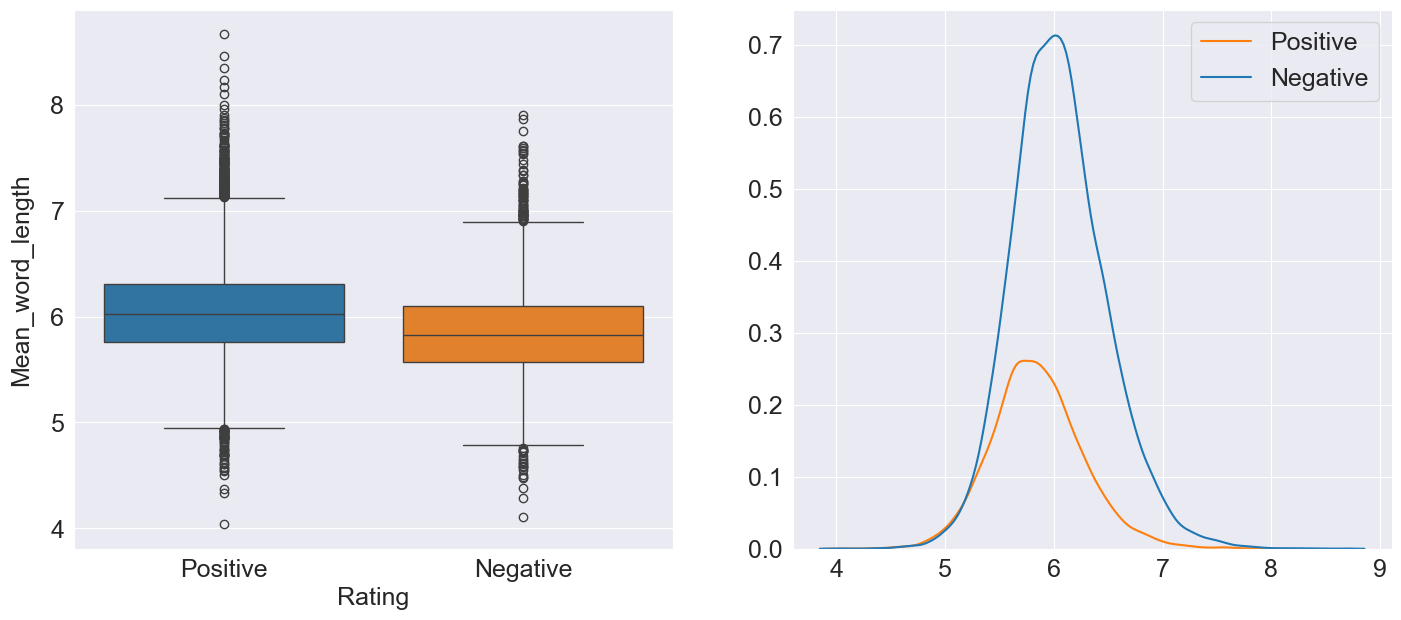

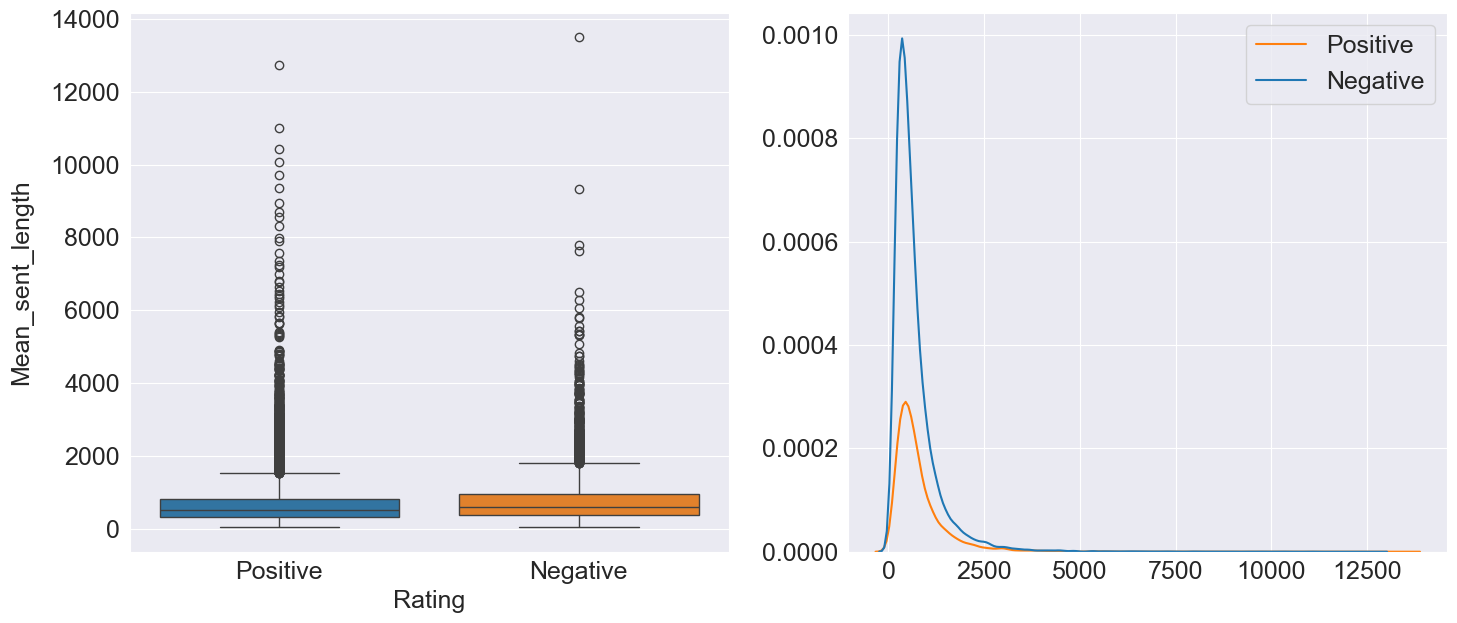

In [7]:
for feature in df.columns[2:]:
    visualize(df, feature)

#### __***Text processing***__
###### __1.Lower case__
###### __2.Removing punctuations__
###### __3.Stopword removal__

In [8]:
df = df[['Rating', 'Review']]
display(df.head())

def process_text(text):
  text = text.lower()
  text = re.sub('[^a-z A-Z 0-9-]+', '', text)
  processed_text = " ".join([word for word in text.split() if word not in stopwords.words('english')])
  return processed_text
df['Review'] = df['Review'].apply(process_text)

df['Review_lists'] = df['Review'].str.split()

display(df.head())

Rating                                             Review
0  Positive  nice hotel expensive parking got good deal sta...
1  Negative  ok nothing special charge diamond member hilto...
2  Negative  nice rooms not 4* experience hotel monaco seat...
3  Positive  unique, great stay, wonderful time hotel monac...
4  Positive  great stay great stay, went seahawk game aweso...

Rating                                             Review  \
0  Positive  nice hotel expensive parking got good deal sta...   
1  Negative  ok nothing special charge diamond member hilto...   
2  Negative  nice rooms 4 experience hotel monaco seattle g...   
3  Positive  unique great stay wonderful time hotel monaco ...   
4  Positive  great stay great stay went seahawk game awesom...   

                                        Review_lists  
0  [nice, hotel, expensive, parking, got, good, d...  
1  [ok, nothing, special, charge, diamond, member...  
2  [nice, rooms, 4, experience, hotel, monaco, se...  
3  [unique, great, stay, wonderful, time, hotel, ...  
4  [great, stay, great, stay, went, seahawk, game...

#### __***Corpus - all words***__

In [9]:
corpus = []
for i in trange(df.shape[0], ncols=150, nrows=10, colour='cyan', smoothing=0.8):
    corpus += df['Review_lists'][i]

len(corpus)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 20491/20491 [00:00<00:00, 127314.57it/s]


2060911

#### __***Word-Frequency count using Counter***__

In [10]:
counts = Counter(corpus)
counts.most_common(10)

[('hotel', 48844),
 ('room', 34279),
 ('great', 21068),
 ('nt', 18989),
 ('good', 16953),
 ('staff', 16193),
 ('stay', 15142),
 ('nice', 12393),
 ('rooms', 12005),
 ('location', 11009)]

#### __***Unigram***__

In [11]:
words = []
frequency = []
for word, count in counts.most_common(10):
  words.append(word)
  frequency.append(count)

Text(0.5, 1.0, 'Total 10 Most Frequent Words')

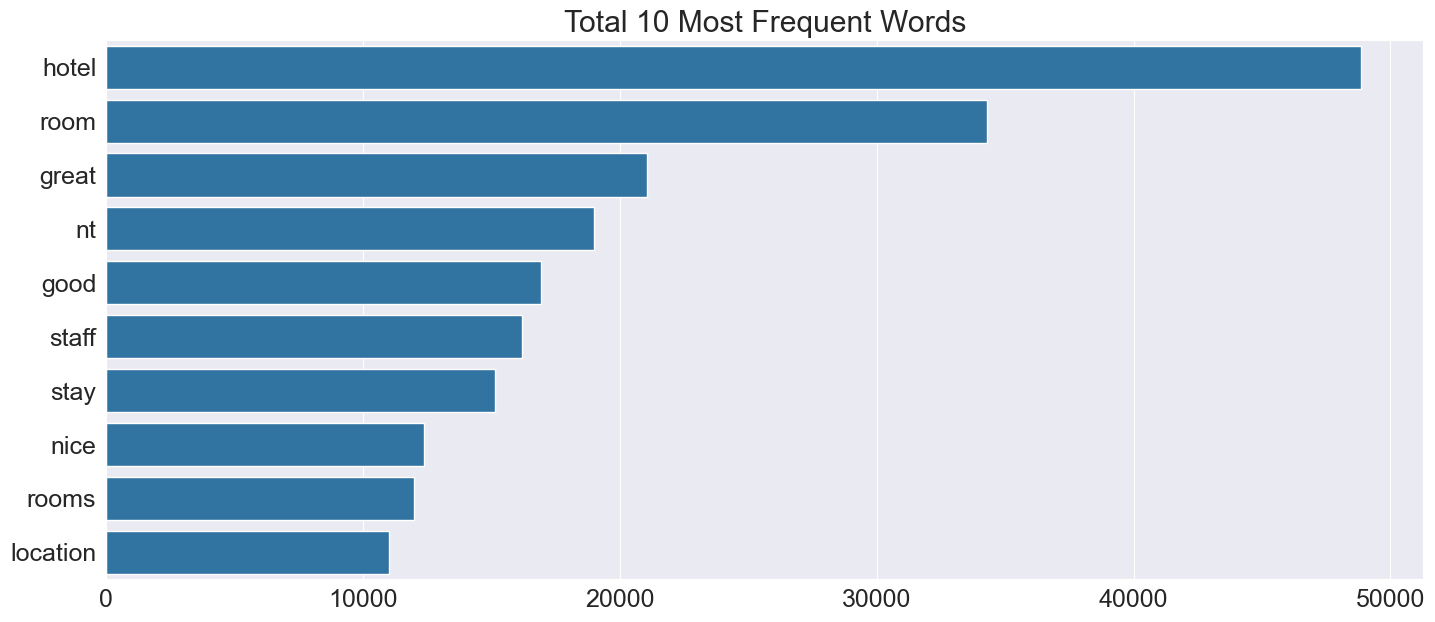

In [12]:
sns.barplot(x=frequency, y=words)
plt.title("Total 10 Most Frequent Words")

#### __***Bigram***__

In [13]:
cv = CountVectorizer(ngram_range=(2,2))
bigrams = cv.fit_transform(df['Review'])
bigrams = bigrams[:2500]
count_values = bigrams.toarray().sum(axis=0)
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "ngram"]

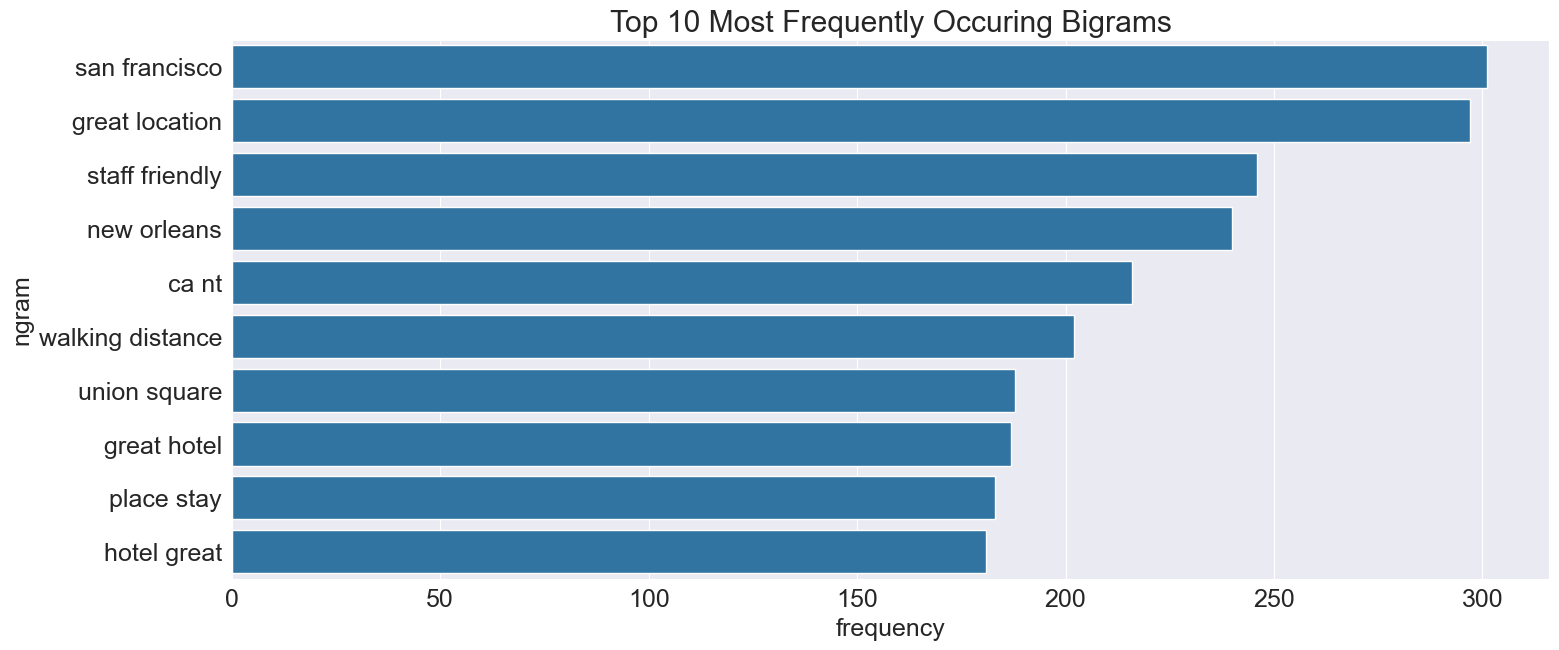

In [14]:
sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10])
plt.title('Top 10 Most Frequently Occuring Bigrams')
plt.show()

#### __***Trigram***__

In [15]:
cv1 = CountVectorizer(ngram_range=(3,3))
trigrams = cv1.fit_transform(df['Review'])

trigrams = trigrams[:2500]
count_values = trigrams.toarray().sum(axis=0)
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv1.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "ngram"]

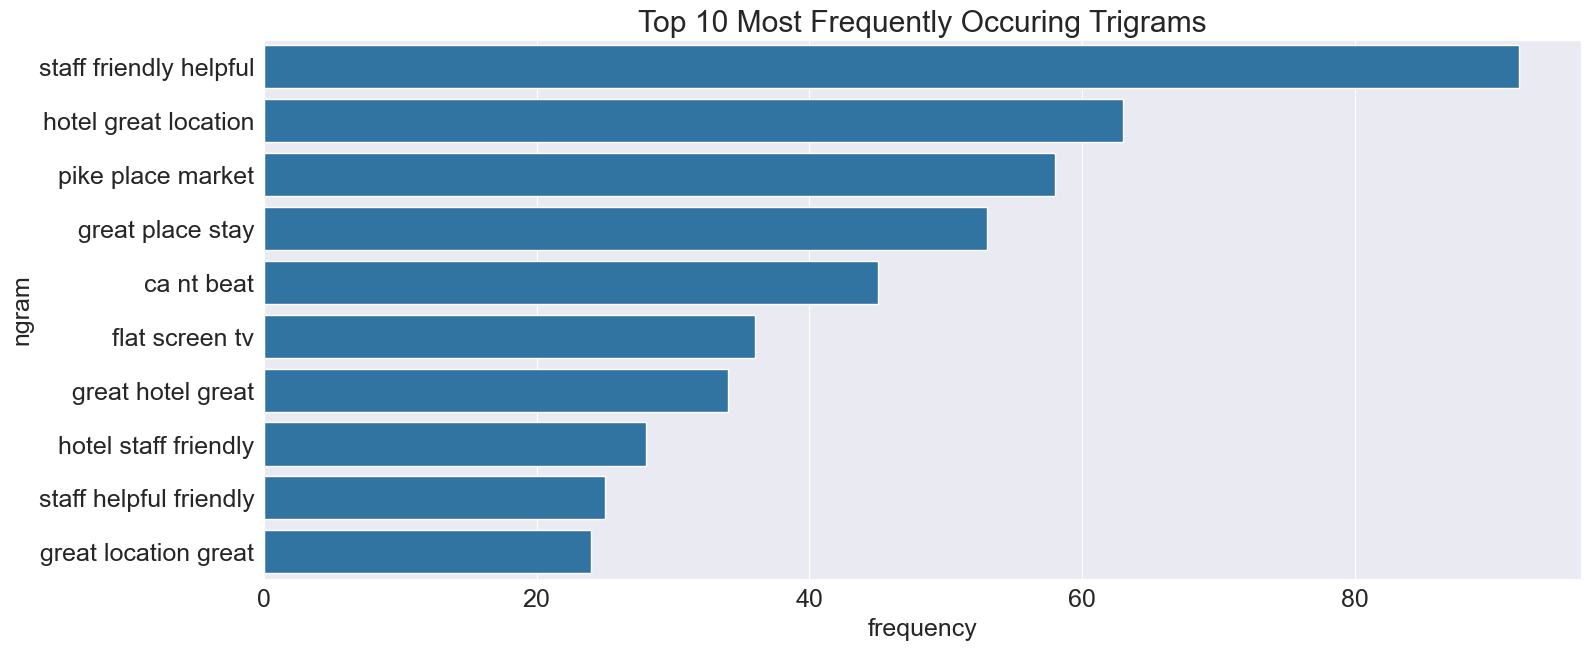

In [16]:
sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10])
plt.title('Top 10 Most Frequently Occuring Trigrams')
plt.show()

#### __***Word cloud of entire corpus***__

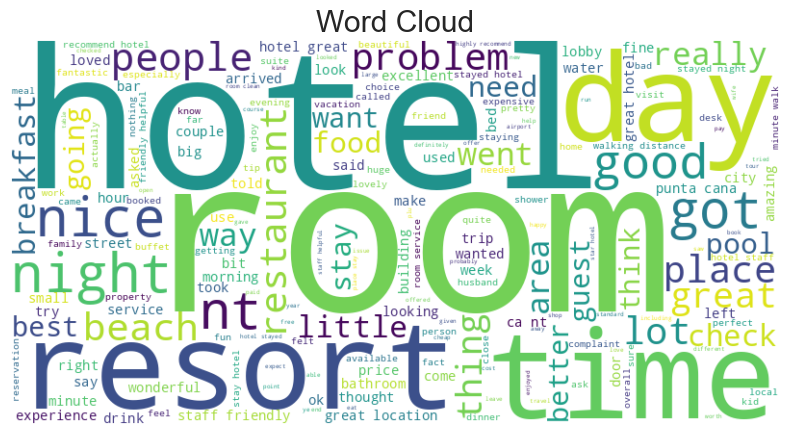

In [17]:
from tkinter.font import BOLD
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='viridis'
).generate(" ".join(corpus))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud")
plt.show()

### __***EDA on Image***__

#### __***Libraries***__

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import tensorflow_datasets as tfds

import warnings
warnings.filterwarnings('ignore')

#### __***Loading Oxford flower dataset from tensorflow_datasets***__

In [19]:
dataset, info=tfds.load('oxford_flowers102', with_info=True, as_supervised=True)

In [20]:
print(info)

tfds.core.DatasetInfo(
    name='oxford_flowers102',
    full_name='oxford_flowers102/2.1.1',
    description="""
    The Oxford Flowers 102 dataset is a consistent of 102 flower categories commonly
    occurring in the United Kingdom. Each class consists of between 40 and 258
    images. The images have large scale, pose and light variations. In addition,
    there are categories that have large variations within the category and several
    very similar categories.
    
    The dataset is divided into a training set, a validation set and a test set. The
    training set and validation set each consist of 10 images per class (totalling
    1020 images each). The test set consists of the remaining 6149 images (minimum
    20 per class).
    
    Note: The dataset by default comes with a test size larger than the train size.
    For more info see this
    [issue](https://github.com/tensorflow/datasets/issues/3022).
    """,
    homepage='https://www.robots.ox.ac.uk/~vgg/data/flowers/102

#### __***Train Images***__

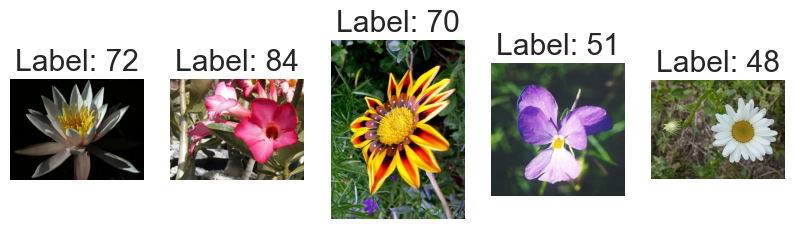

In [21]:
train, test = dataset['train'], dataset['test']

def plot_images(dataset, n=5):
    plt.figure(figsize=(10, 15))
    for i, (image, label) in enumerate(dataset.take(n)):
        plt.subplot(1, n, i + 1)
        plt.imshow(image.numpy())
        plt.title(f"Label: {label.numpy()}")
        plt.axis("off")
    plt.show()

plot_images(train)

#### __***Balanced Dataset***__

Text(0, 0.5, 'No of Images')

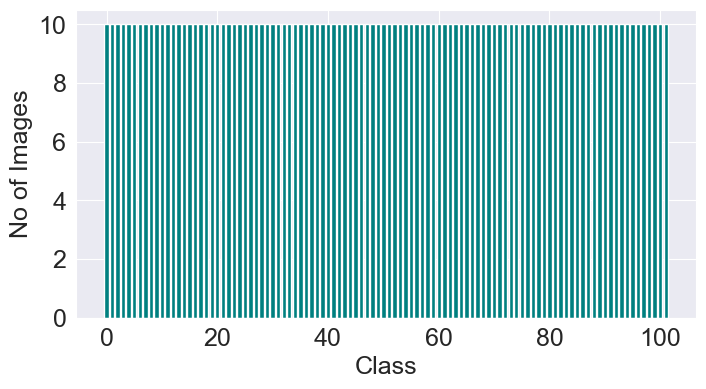

In [22]:
class_counts = {}

for _, label in train:
  class_counts[label.numpy()] = class_counts.get(label.numpy(), 0) + 1

plt.figure(figsize=(8, 4))
plt.bar(class_counts.keys(), class_counts.values(), color='teal')
plt.xlabel("Class")
plt.ylabel("No of Images")

#### __***Images Height x Width Scatterplot***__

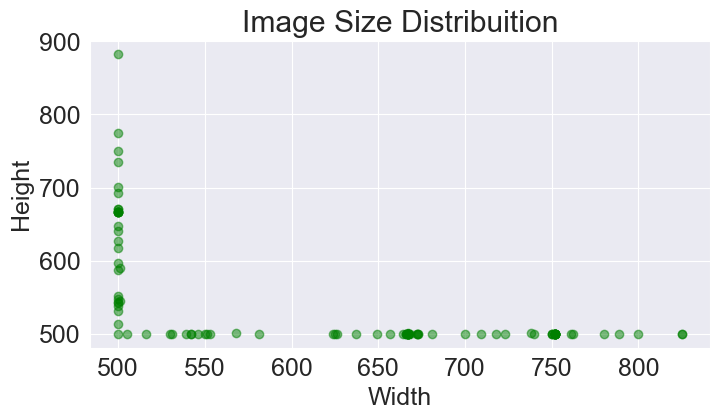

In [23]:
image_sizes=[]
for image, _ in train.take(100):
  image_sizes.append(image.shape)
height,width = zip(*[(h,w) for h,w,_ in image_sizes])

plt.figure(figsize=(8,4))
plt.scatter(width, height, alpha=0.5, color='green')
plt.xlabel("Width")
plt.ylabel("Height")
plt.title("Image Size Distribuition")
plt.show()

#### __***RGB Distribution***__

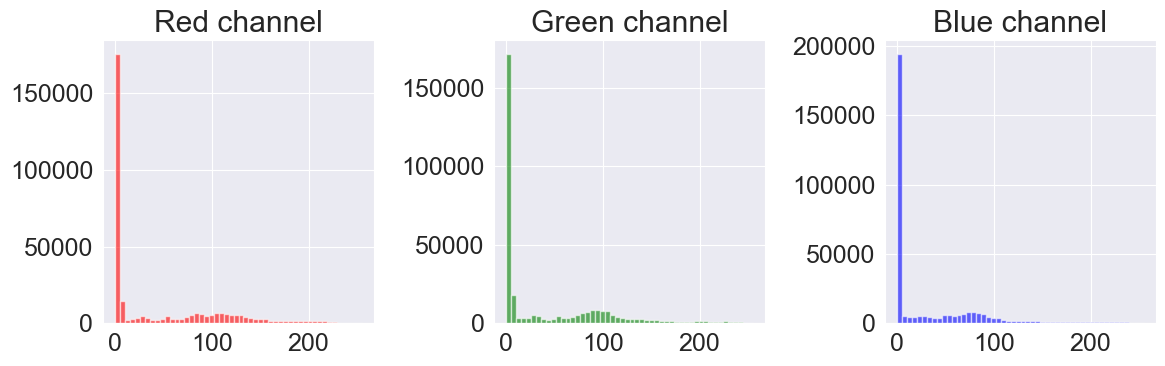

In [24]:
def plot_rgb(dataset, n=1):
  image, _ = next(iter(dataset))
  r,g,b = image[...,0], image[...,1], image[...,2]

  plt.figure(figsize=(12,4))

  plt.subplot(1,3,1)
  plt.hist(r.numpy().flatten(), bins=50, color="red", alpha=0.6)
  plt.title("Red channel")

  plt.subplot(1,3,2)
  plt.hist(g.numpy().flatten(), bins=50, color="green", alpha=0.6)
  plt.title("Green channel")

  plt.subplot(1,3,3)
  plt.hist(b.numpy().flatten(), bins=50, color="blue", alpha=0.6)
  plt.title("Blue channel")

  plt.tight_layout()
  plt.show()

plot_rgb(train)

#### __***Data Agumentation***__

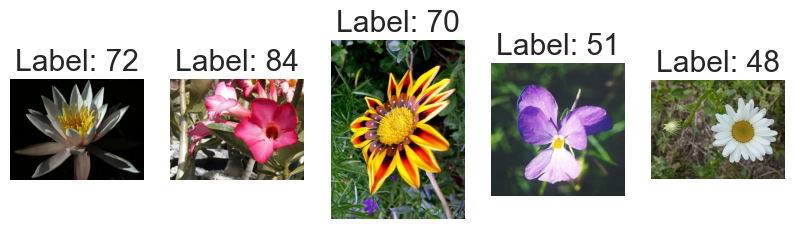

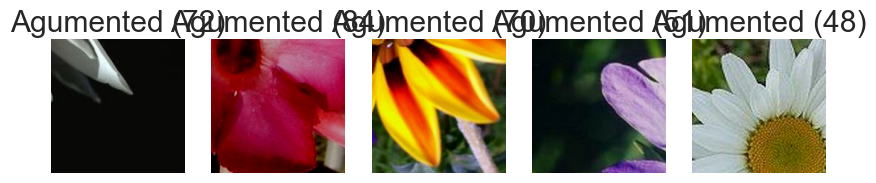

In [25]:
def augment_image(image):
  image = tf.image.random_flip_left_right(image)
  image = tf.image.random_flip_up_down(image)
  image = tf.image.random_crop(image,size=[180,180,3])
  image = tf.image.random_brightness(image,max_delta=0.3)
  return image

def plot_augmented_images(dataset, n=5):
    plt.figure(figsize=(10, 15))
    for i, (image, label) in enumerate(dataset.take(n)):
        agumented_image = augment_image(image)
        plt.subplot(1, n, i + 1)
        plt.imshow(agumented_image.numpy())
        plt.title(f"Agumented ({label.numpy()})")
        plt.axis("off")
    plt.show()

plot_images(train)
plot_augmented_images(train)

### __***EDA on Tabular Data (Loan Dataset)***__

#### __***Data Insights***__
###### __1. Overview__
###### __2. Data Quality__
###### __3. Summary Statistics__
###### __4. Loan Performance__
###### __5. Interest Rate Analysis__
###### __6. Installment Insights__
###### __7. Customer Financials__
###### __8. FICO Score Analysis__
###### __9. Credit Line Insights__
###### __10. Revolving Balance & Utilization__
###### __11. Inquires & Defaults__
###### __12. Delinquency & Public Recors__

#### __***Libraries***__

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### __***Loan dataset***__

In [27]:
df = pd.read_csv('data/loan.csv')
print("Shape:", df.shape)
df.head()

Shape: (9578, 14)


credit.policy             purpose  int.rate  installment  log.annual.inc  \
0              1  debt_consolidation    0.1189       829.10       11.350407   
1              1         credit_card    0.1071       228.22       11.082143   
2              1  debt_consolidation    0.1357       366.86       10.373491   
3              1  debt_consolidation    0.1008       162.34       11.350407   
4              1         credit_card    0.1426       102.92       11.299732   

     dti  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0  19.48   737        5639.958333      28854        52.1               0   
1  14.29   707        2760.000000      33623        76.7               0   
2  11.63   682        4710.000000       3511        25.6               1   
3   8.10   712        2699.958333      33667        73.2               1   
4  14.97   667        4066.000000       4740        39.5               0   

   delinq.2yrs  pub.rec  not.fully.paid  
0            0        0               0  
1            0        0               0  
2            0        0               0  
3            0        0               0  
4            1        0               0

#### __***Info***__

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


#### __***Count Plot***__

credit.policy
1    7710
0    1868
Name: count, dtype: int64

<Axes: xlabel='credit.policy', ylabel='count'>

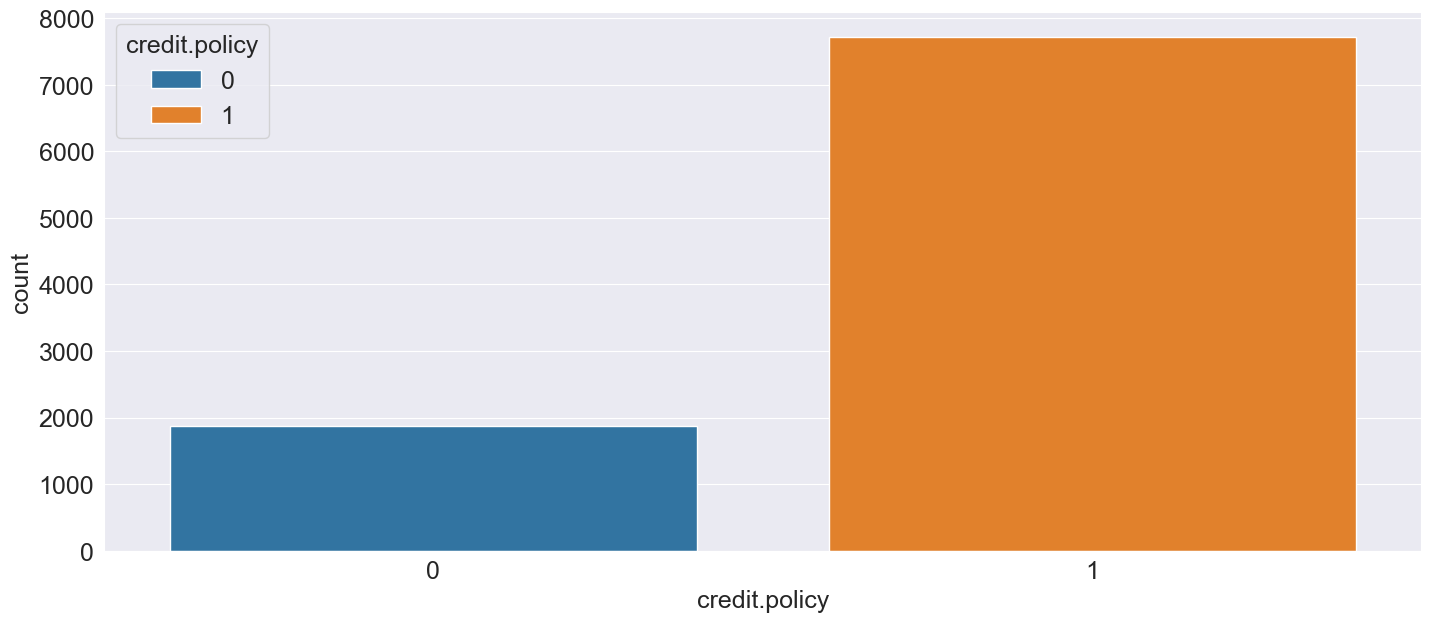

In [29]:
display(df['credit.policy'].value_counts())
sns.countplot(df, x='credit.policy', hue='credit.policy')

purpose
debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: count, dtype: int64

<Axes: xlabel='purpose', ylabel='count'>

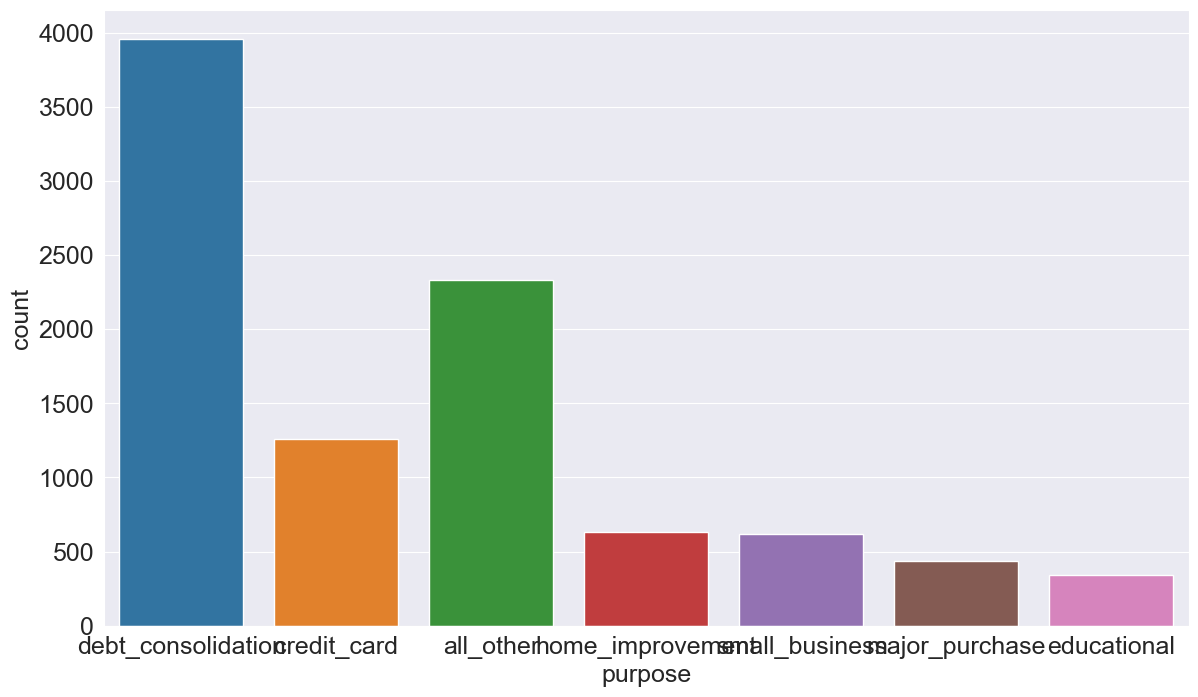

In [30]:
display(df['purpose'].value_counts())
plt.figure(figsize=(14,8))
sns.countplot(df, x='purpose', hue='purpose')

#### __***Missing values & Summary statistics***__

In [31]:
print("Missing Values")
display(df.isnull().sum())

print("Summary Statistics")
display(df.describe())

Missing Values


credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

Summary Statistics


credit.policy     int.rate  installment  log.annual.inc          dti  \
count    9578.000000  9578.000000  9578.000000     9578.000000  9578.000000   
mean        0.804970     0.122640   319.089413       10.932117    12.606679   
std         0.396245     0.026847   207.071301        0.614813     6.883970   
min         0.000000     0.060000    15.670000        7.547502     0.000000   
25%         1.000000     0.103900   163.770000       10.558414     7.212500   
50%         1.000000     0.122100   268.950000       10.928884    12.665000   
75%         1.000000     0.140700   432.762500       11.291293    17.950000   
max         1.000000     0.216400   940.140000       14.528354    29.960000   

              fico  days.with.cr.line     revol.bal   revol.util  \
count  9578.000000        9578.000000  9.578000e+03  9578.000000   
mean    710.846314        4560.767197  1.691396e+04    46.799236   
std      37.970537        2496.930377  3.375619e+04    29.014417   
min     612.000000         178.958333  0.000000e+00     0.000000   
25%     682.000000        2820.000000  3.187000e+03    22.600000   
50%     707.000000        4139.958333  8.596000e+03    46.300000   
75%     737.000000        5730.000000  1.824950e+04    70.900000   
max     827.000000       17639.958330  1.207359e+06   119.000000   

       inq.last.6mths  delinq.2yrs      pub.rec  not.fully.paid  
count     9578.000000  9578.000000  9578.000000     9578.000000  
mean         1.577469     0.163708     0.062122        0.160054  
std          2.200245     0.546215     0.262126        0.366676  
min          0.000000     0.000000     0.000000        0.000000  
25%          0.000000     0.000000     0.000000        0.000000  
50%          1.000000     0.000000     0.000000        0.000000  
75%          2.000000     0.000000     0.000000        0.000000  
max         33.000000    13.000000     5.000000        1.000000

#### __***Distribution of Installment***__

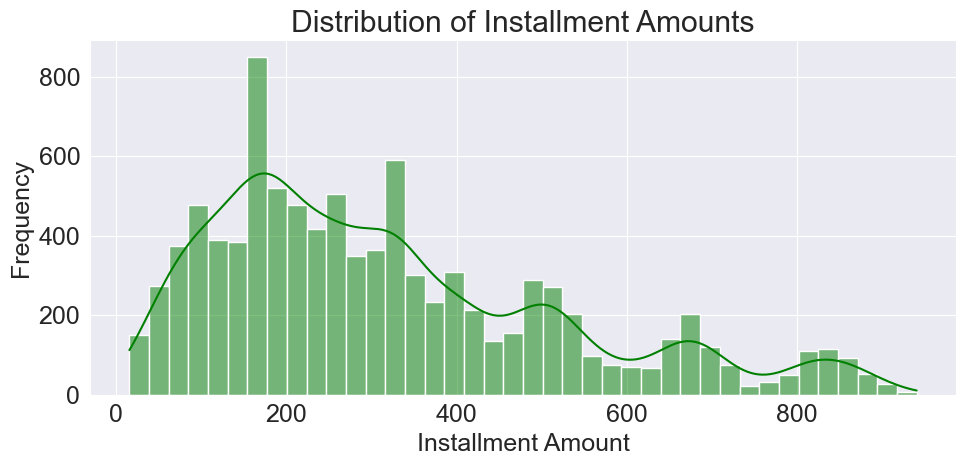

In [32]:
plt.figure(figsize=(10, 5))
sns.histplot(df['installment'], bins=40, kde=True, color='green')
plt.title("Distribution of Installment Amounts")
plt.xlabel("Installment Amount")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

#### __***Loan purpose vs Installment - Box plot***__

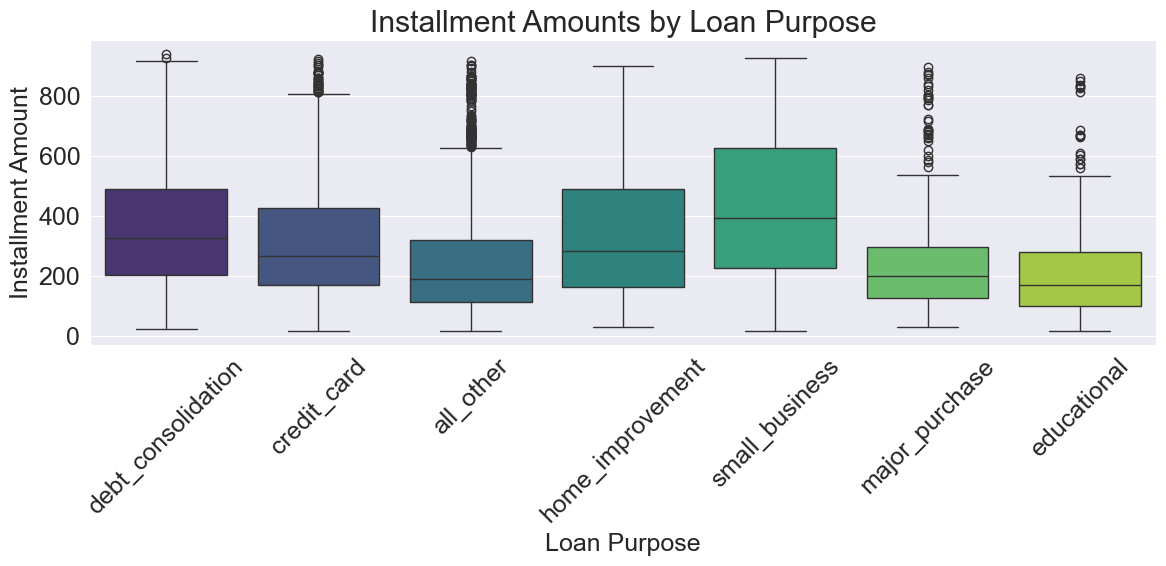

In [33]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='purpose', y='installment', palette='viridis', hue='purpose', legend=False)
plt.xticks(rotation=45)
plt.title("Installment Amounts by Loan Purpose")
plt.xlabel("Loan Purpose")
plt.ylabel("Installment Amount")
plt.tight_layout()
plt.show()

#### __***Debt-to-Income Ratio***__

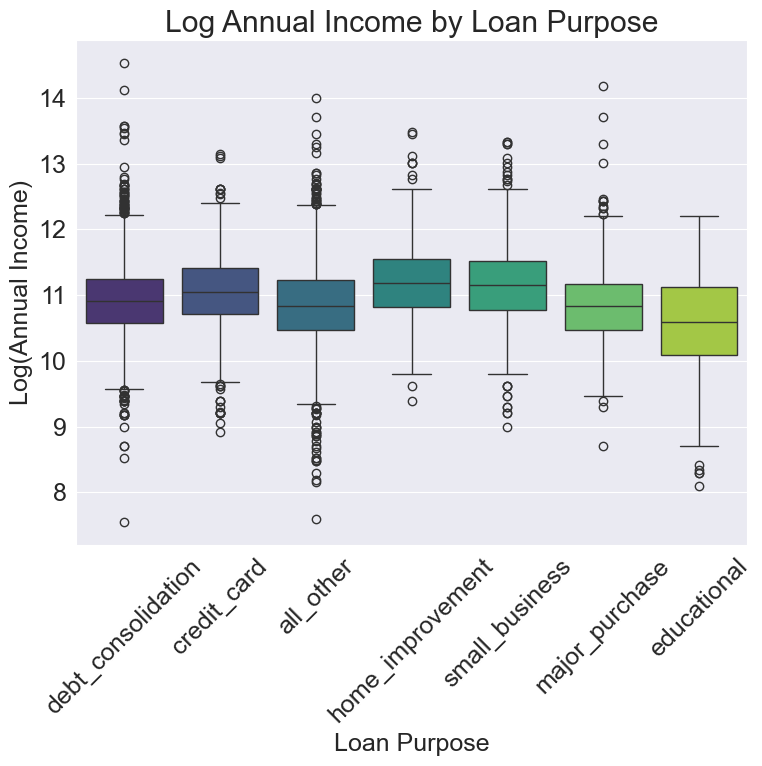

Average Debt-to-Income Ratio: 12.60667884735853


In [34]:
avg_dti = df['dti'].mean()

plt.figure(figsize=(8, 8))
sns.boxplot(data=df, x='purpose', y='log.annual.inc', palette='viridis', hue='purpose', legend=False)
plt.xticks(rotation=45)
plt.title("Log Annual Income by Loan Purpose")
plt.xlabel("Loan Purpose")
plt.ylabel("Log(Annual Income)")
plt.tight_layout()
plt.show()

print("Average Debt-to-Income Ratio:", avg_dti)

#### __***FICO Score Analysis***__

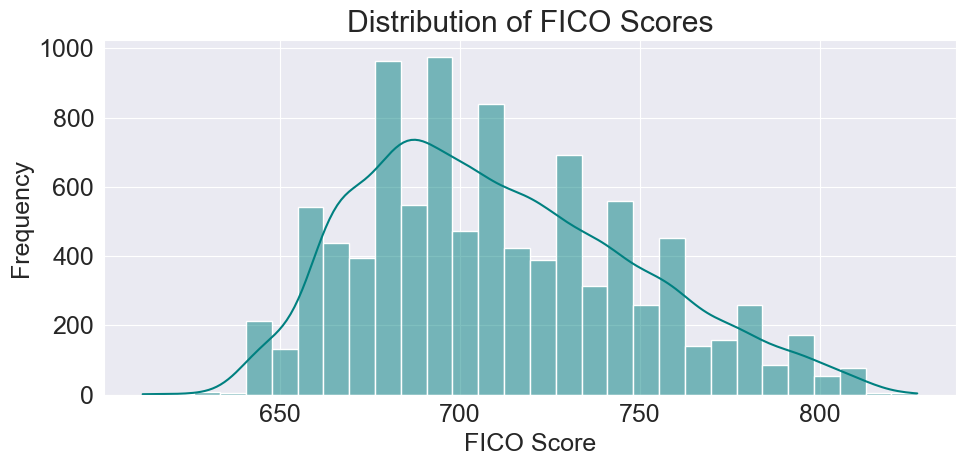

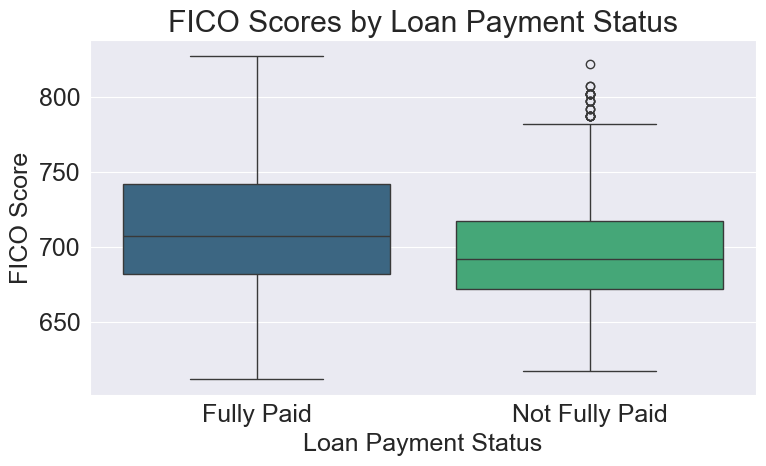

In [35]:
plt.figure(figsize=(10, 5))
sns.histplot(df['fico'], bins=30, kde=True, color='teal')
plt.title("Distribution of FICO Scores")
plt.xlabel("FICO Score")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='not.fully.paid', y='fico', palette='viridis', hue = 'not.fully.paid', legend=False)
plt.xticks([0, 1], ['Fully Paid', 'Not Fully Paid'])
plt.title("FICO Scores by Loan Payment Status")
plt.xlabel("Loan Payment Status")
plt.ylabel("FICO Score")
plt.tight_layout()
plt.show()

#### __***Credit Line Insights***__

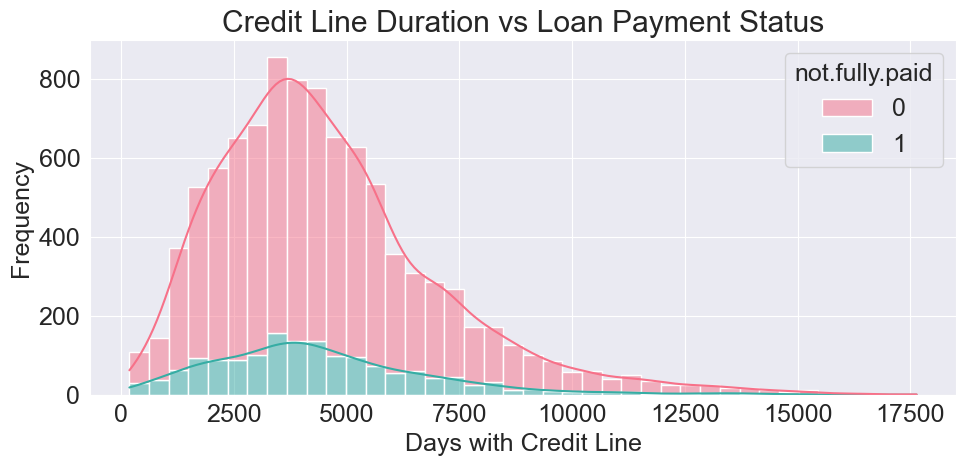

Average CLD for not paid loans: 4393.541258955838
Median CLD for not paid loans: 4050.0


In [36]:
not_paid = df[df['not.fully.paid'] == 1]

avg_days_credit_line = not_paid['days.with.cr.line'].mean()
median_days_credit_line = not_paid['days.with.cr.line'].median()

plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='days.with.cr.line', hue='not.fully.paid', bins=40, kde=True, palette='husl', multiple='stack')
plt.title("Credit Line Duration vs Loan Payment Status")
plt.xlabel("Days with Credit Line")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

print("Average CLD for not paid loans:", avg_days_credit_line)
print("Median CLD for not paid loans:", median_days_credit_line)

#### __***Revolving Balance vs FICO***__

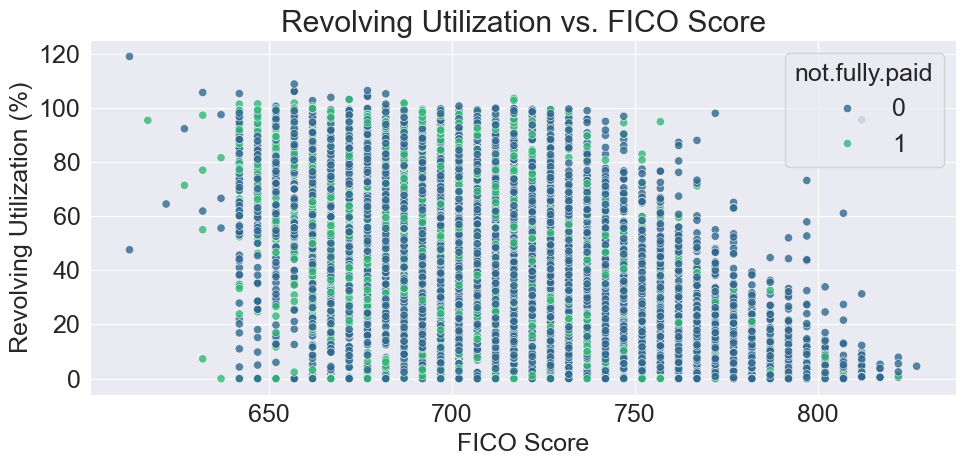

Average Revolving Balance: 13798.404280155642


In [37]:
avg_revol_bal_policy = df[df['credit.policy'] == 1]['revol.bal'].mean()

plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='fico', y='revol.util', hue='not.fully.paid', palette='viridis', alpha=0.8)
plt.title("Revolving Utilization vs. FICO Score")
plt.xlabel("FICO Score")
plt.ylabel("Revolving Utilization (%)")
plt.tight_layout()
plt.show()

print("Average Revolving Balance:", avg_revol_bal_policy)

#### __***Last 6 months Inquires vs Loan Payment Status***__

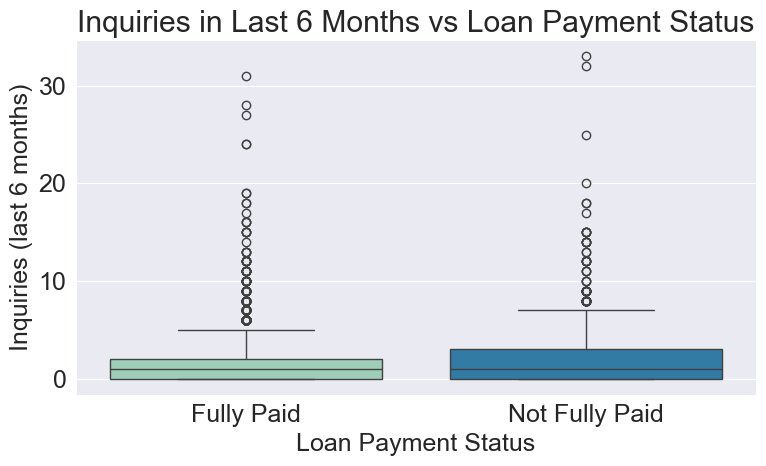

not.fully.paid
0    1.433934
1    2.330724
Name: inq.last.6mths, dtype: float64

In [38]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='not.fully.paid', y='inq.last.6mths', palette='YlGnBu', hue='not.fully.paid', legend=False)
plt.xticks([0, 1], ['Fully Paid', 'Not Fully Paid'])
plt.title("Inquiries in Last 6 Months vs Loan Payment Status")
plt.xlabel("Loan Payment Status")
plt.ylabel("Inquiries (last 6 months)")
plt.tight_layout()
plt.show()

inq_stats = df.groupby('not.fully.paid')['inq.last.6mths'].mean()
inq_stats

#### __***Delinquency & Public Records***__

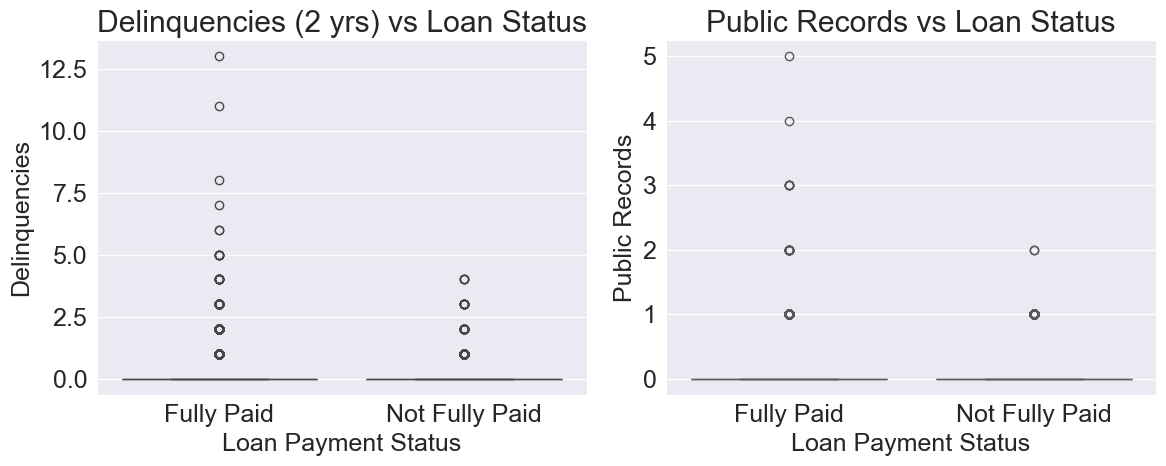

purpose
all_other             0.179751
major_purchase        0.173913
debt_consolidation    0.163255
educational           0.157434
small_business        0.155089
credit_card           0.151347
home_improvement      0.136725
Name: delinq.2yrs, dtype: float64

In [39]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.boxplot(data=df, x='not.fully.paid', y='delinq.2yrs', ax=axes[0], palette='Set1', hue='not.fully.paid', legend = False)
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['Fully Paid', 'Not Fully Paid'])
axes[0].set_title("Delinquencies (2 yrs) vs Loan Status")
axes[0].set_xlabel("Loan Payment Status")
axes[0].set_ylabel("Delinquencies")

sns.boxplot(data=df, x='not.fully.paid', y='pub.rec', ax=axes[1], palette='Set2', hue='not.fully.paid', legend = False)
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['Fully Paid', 'Not Fully Paid'])
axes[1].set_title("Public Records vs Loan Status")
axes[1].set_xlabel("Loan Payment Status")
axes[1].set_ylabel("Public Records")
plt.tight_layout()
plt.show()

delinq_by_purpose = df.groupby('purpose')['delinq.2yrs'].mean().sort_values(ascending=False)
delinq_by_purpose

#### __***Visualizations (Hist, Box, Scatter, Bar, Heatmap, Pie)***__

##### __***Histogram***__

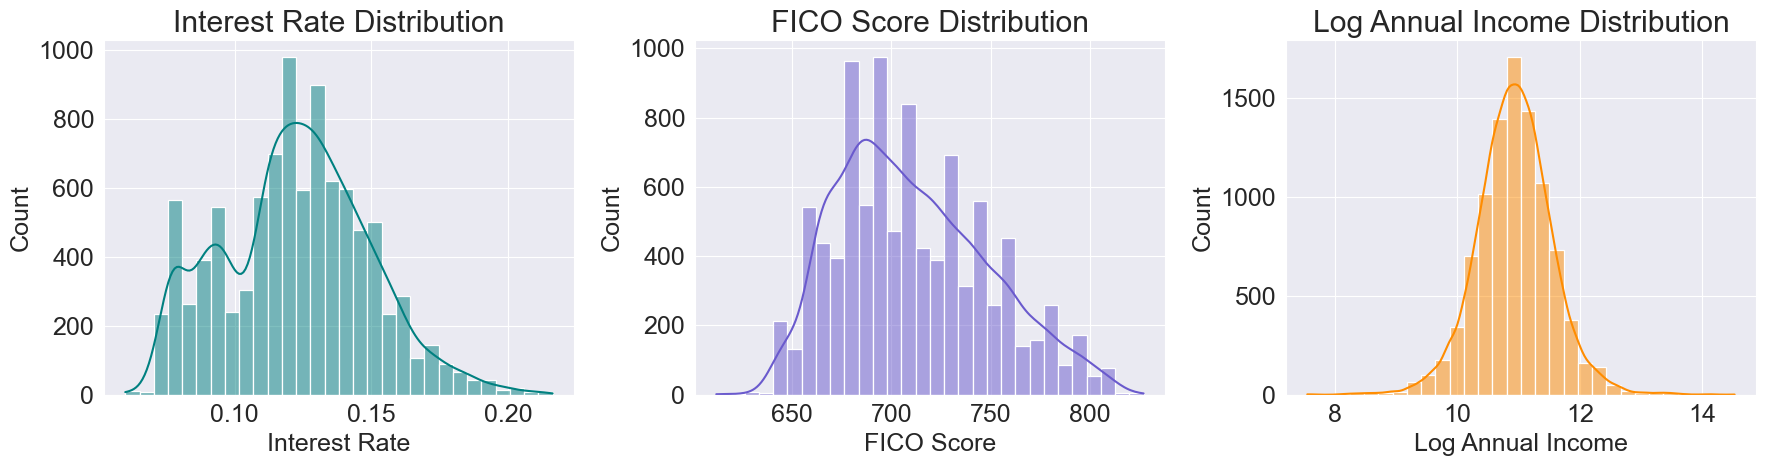

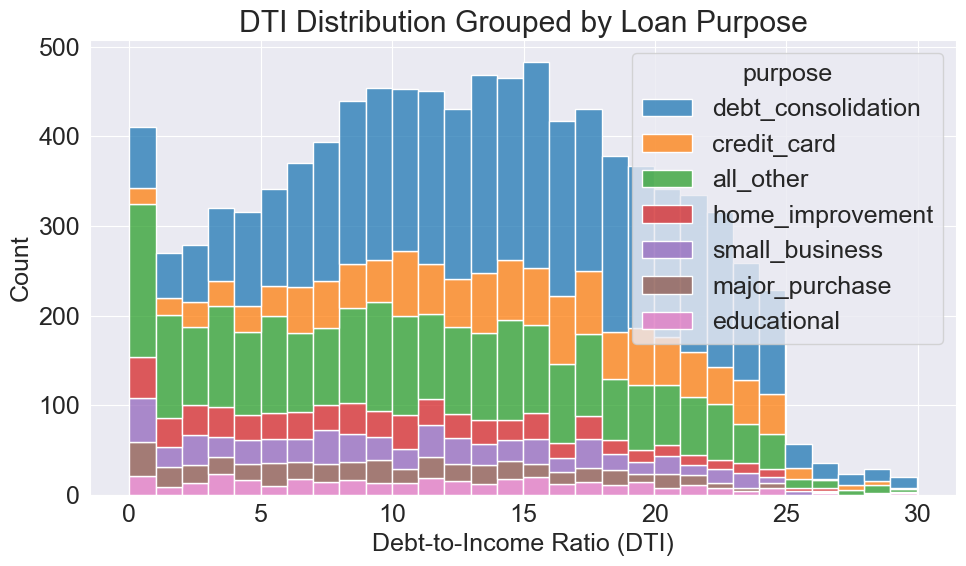

In [40]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(df['int.rate'], bins=30, kde=True, ax=axes[0], color='teal')
axes[0].set_title("Interest Rate Distribution")
axes[0].set_xlabel("Interest Rate")

sns.histplot(df['fico'], bins=30, kde=True, ax=axes[1], color='slateblue')
axes[1].set_title("FICO Score Distribution")
axes[1].set_xlabel("FICO Score")

sns.histplot(df['log.annual.inc'], bins=30, kde=True, ax=axes[2], color='darkorange')
axes[2].set_title("Log Annual Income Distribution")
axes[2].set_xlabel("Log Annual Income")

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='dti', hue='purpose', bins=30, multiple='stack', palette='tab10')
plt.title("DTI Distribution Grouped by Loan Purpose")
plt.xlabel("Debt-to-Income Ratio (DTI)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

##### __***Boxplot***__

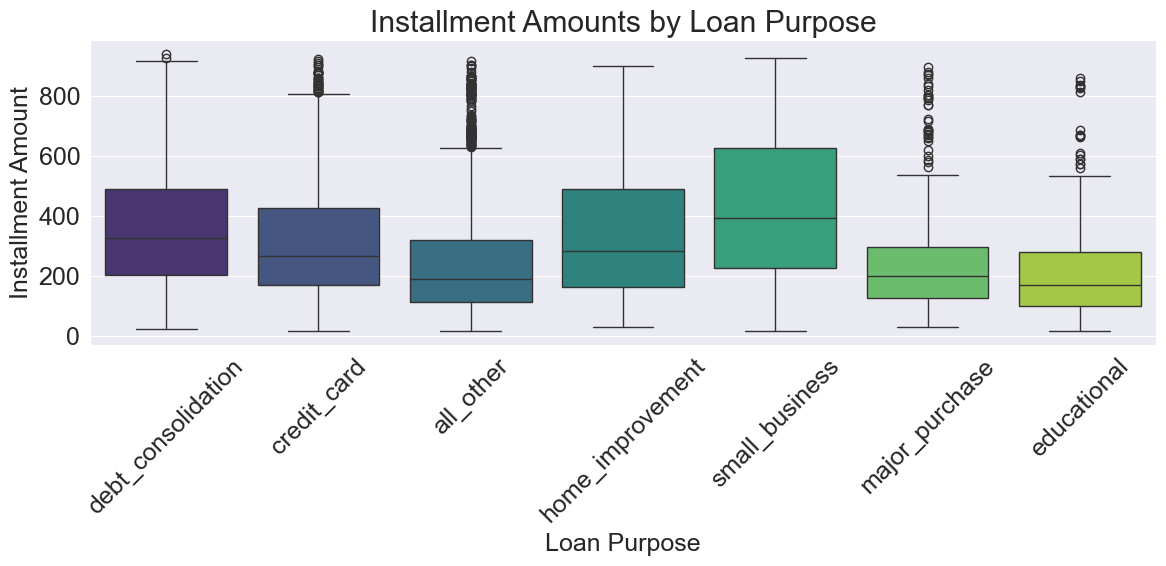

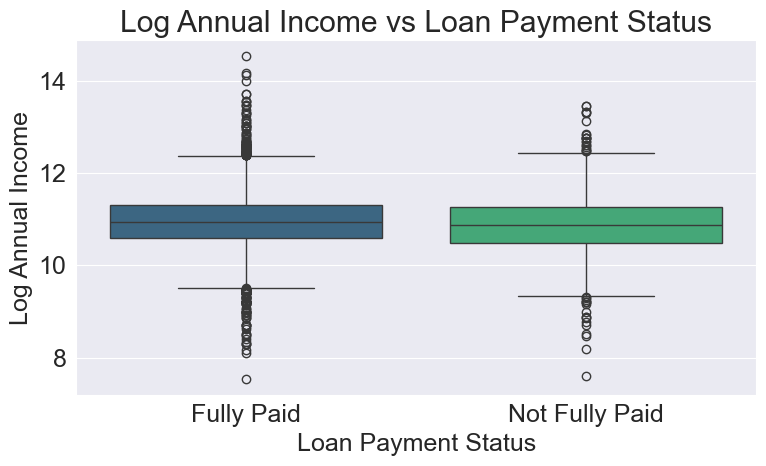

In [41]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='purpose', y='installment', palette='viridis', hue='purpose', legend=False)
plt.title("Installment Amounts by Loan Purpose")
plt.xlabel("Loan Purpose")
plt.ylabel("Installment Amount")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='not.fully.paid', y='log.annual.inc', palette='viridis', hue='not.fully.paid', legend=False)
plt.xticks([0, 1], ['Fully Paid', 'Not Fully Paid'])
plt.title("Log Annual Income vs Loan Payment Status")
plt.xlabel("Loan Payment Status")
plt.ylabel("Log Annual Income")
plt.tight_layout()
plt.show()

##### __***Scatter Plot***__

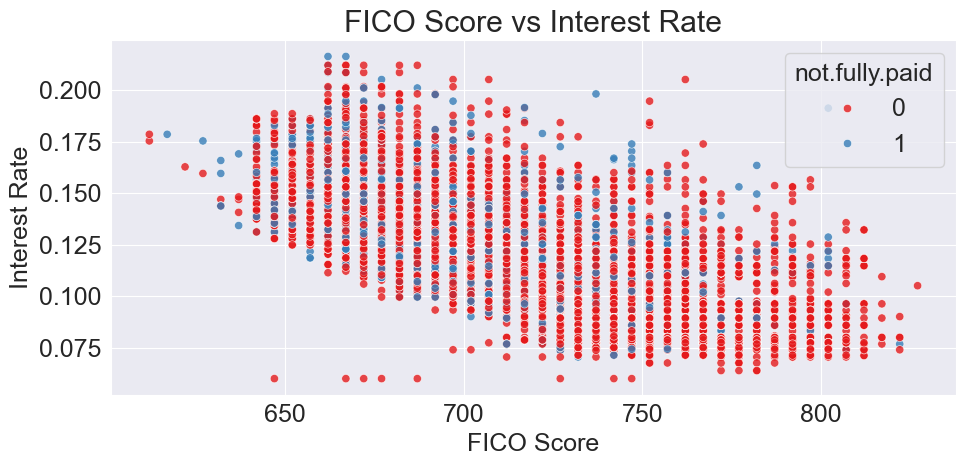

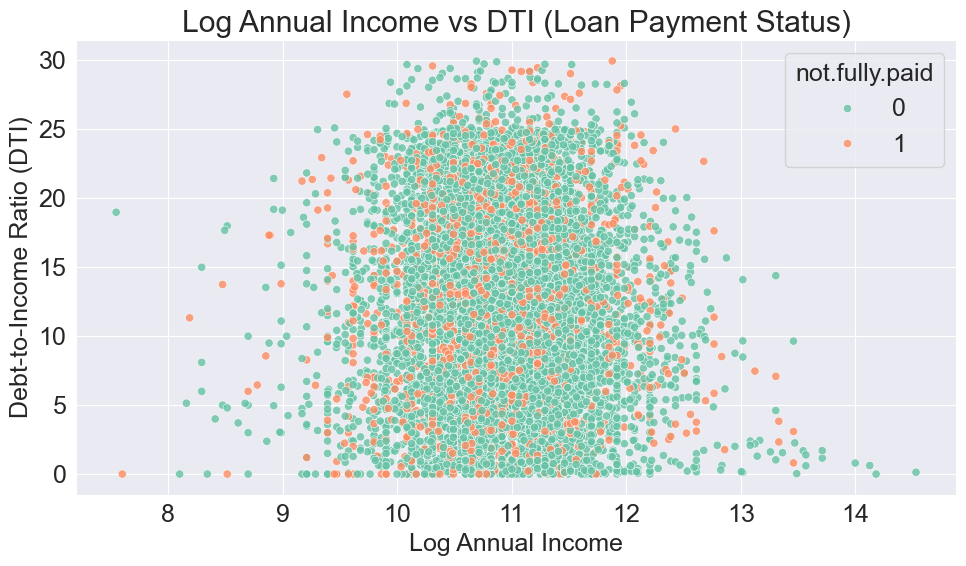

In [42]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='fico', y='int.rate', hue='not.fully.paid', palette='Set1', alpha=0.8)
plt.title("FICO Score vs Interest Rate")
plt.xlabel("FICO Score")
plt.ylabel("Interest Rate")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='log.annual.inc', y='dti', hue='not.fully.paid', palette='Set2', alpha=0.8)
plt.title("Log Annual Income vs DTI (Loan Payment Status)")
plt.xlabel("Log Annual Income")
plt.ylabel("Debt-to-Income Ratio (DTI)")
plt.tight_layout()
plt.show()

##### __***Bar Plot***__

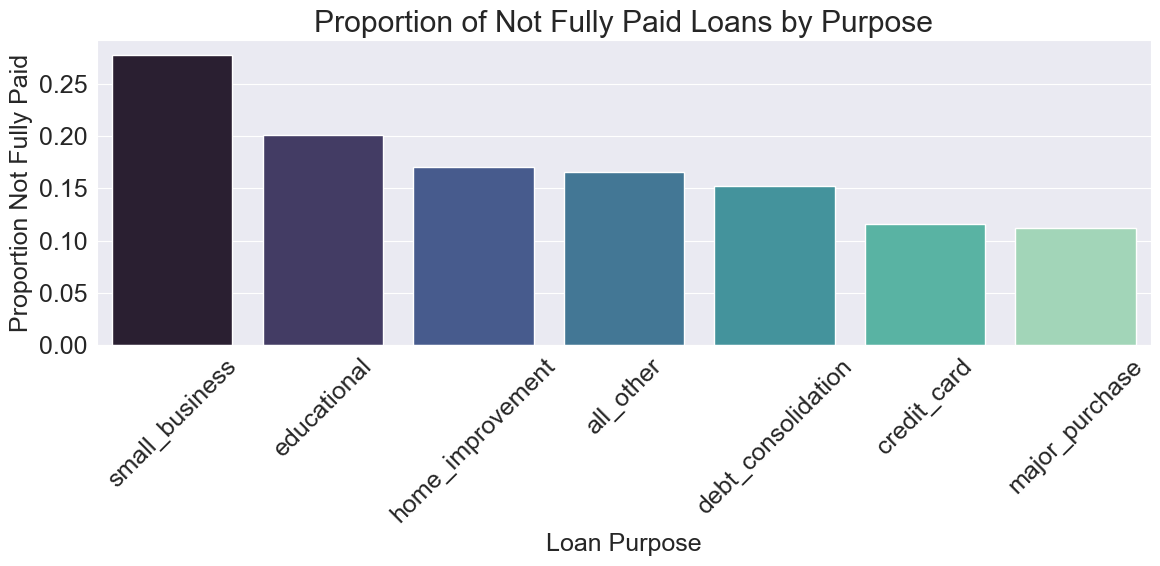

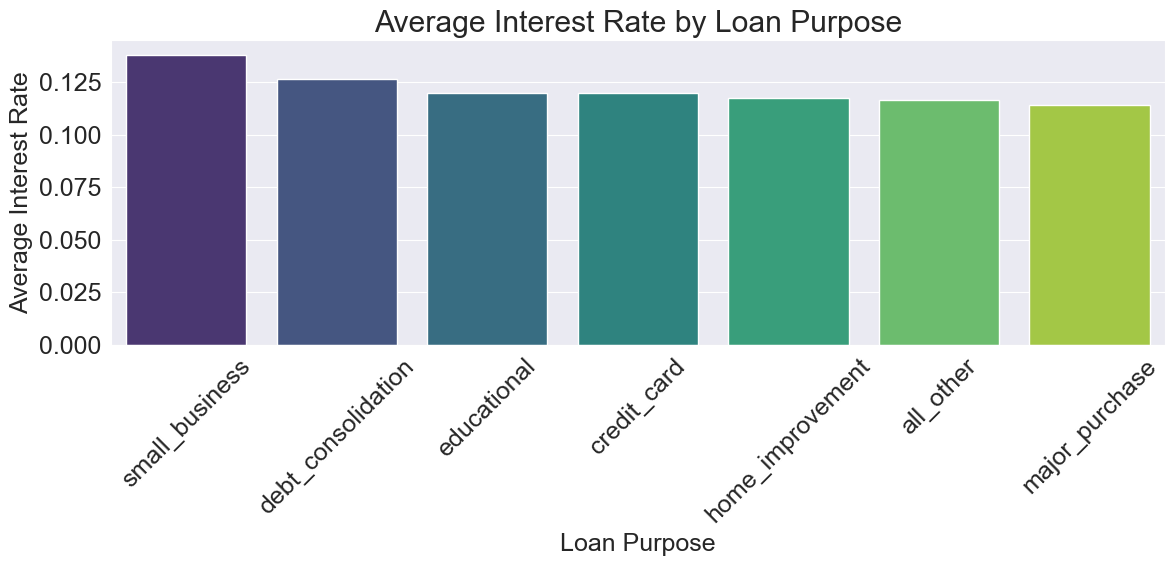

In [43]:
plt.figure(figsize=(12, 6))
purpose_default = df.groupby('purpose')['not.fully.paid'].mean().sort_values(ascending=False)
sns.barplot(x=purpose_default.index, y=purpose_default.values, palette='mako', hue=purpose_default.index, legend=False)
plt.title("Proportion of Not Fully Paid Loans by Purpose")
plt.xlabel("Loan Purpose")
plt.ylabel("Proportion Not Fully Paid")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
avg_int_rate_by_purpose = df.groupby('purpose')['int.rate'].mean().sort_values(ascending=False)
sns.barplot(x=avg_int_rate_by_purpose.index, y=avg_int_rate_by_purpose.values, palette='viridis', hue=avg_int_rate_by_purpose.index, legend=False)
plt.title("Average Interest Rate by Loan Purpose")
plt.xlabel("Loan Purpose")
plt.ylabel("Average Interest Rate")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### __***EDA on Tabular Data (IMDB Dataset)***__

#### __***Libraries***__

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

#### __***IMDB dataset***__

In [45]:
df = pd.read_csv('data/IMDB.csv')
df.head()

Rank                    Title                     Genre  \
0     1  Guardians of the Galaxy   Action,Adventure,Sci-Fi   
1     2               Prometheus  Adventure,Mystery,Sci-Fi   
2     3                    Split           Horror,Thriller   
3     4                     Sing   Animation,Comedy,Family   
4     5            Suicide Squad  Action,Adventure,Fantasy   

                                         Description              Director  \
0  A group of intergalactic criminals are forced ...            James Gunn   
1  Following clues to the origin of mankind, a te...          Ridley Scott   
2  Three girls are kidnapped by a man with a diag...    M. Night Shyamalan   
3  In a city of humanoid animals, a hustling thea...  Christophe Lourdelet   
4  A secret government agency recruits some of th...            David Ayer   

                                              Actors  Year  Runtime (Minutes)  \
0  Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...  2014                121   
1  Noomi Rapace, Logan Marshall-Green, Michael Fa...  2012                124   
2  James McAvoy, Anya Taylor-Joy, Haley Lu Richar...  2016                117   
3  Matthew McConaughey,Reese Witherspoon, Seth Ma...  2016                108   
4  Will Smith, Jared Leto, Margot Robbie, Viola D...  2016                123   

   Rating   Votes  Revenue (Millions)  Metascore  
0     8.1  757074              333.13       76.0  
1     7.0  485820              126.46       65.0  
2     7.3  157606              138.12       62.0  
3     7.2   60545              270.32       59.0  
4     6.2  393727              325.02       40.0

#### __***Drop duplicates***__

In [46]:
duplicates = df[df['Title'].duplicated()]
df.drop_duplicates(inplace=True)
print("Duplicates:", duplicates['Title'].values)

Duplicates: ['The Host']


#### __***Analyzing Attributes***__

##### __***Title***__

In [47]:
words = ' ' .join(df['Title']).split()
print("Most Frequent Words in Title:", Counter(words).most_common(5))
print("Average Title Length:", df['Title'].apply(len).mean())
print("Average Word Count in Title:", len(words)/len(df['Title']))

Most Frequent Words in Title: [('The', 225), ('of', 92), ('the', 79), ('and', 22), ('2', 20)]
Average Title Length: 14.539
Average Word Count in Title: 2.605


##### __***Description***__

In [48]:
descriptions = ' '.join(df['Description']).split()
print("Most Frequent Words in Description:", Counter(descriptions).most_common(5))
print("Average Description Length:", df['Description'].apply(len).mean())
print("Average Word Count in Description:", len(descriptions)/len(df))
print("Missing Description:", df['Description'].isnull().sum())

Most Frequent Words in Description: [('a', 1284), ('the', 1240), ('to', 933), ('of', 806), ('and', 712)]
Average Description Length: 163.232
Average Word Count in Description: 27.921
Missing Description: 0


###### __***Actors***__

In [49]:
all_actors = ','.join(df['Actors']).split(',')
print("Actors - Movie Count:", Counter(all_actors).most_common(3))

actor_pairs = []
for actors in df['Actors'].str.split(','):
  actor_pairs += [(a1.strip(), a2.strip()) for a1, a2 in zip(actors, actors[1:])]

print("Common Actor Pairs:\n", Counter(actor_pairs).most_common(3))

Actors - Movie Count: [('Christian Bale', 11), ('Mark Wahlberg', 11), ('Matthew McConaughey', 9)]
Common Actor Pairs:
 [(('Vin Diesel', 'Paul Walker'), 4), (('Daniel Radcliffe', 'Emma Watson'), 4), (('Emma Watson', 'Rupert Grint'), 4)]


#### __***Frequency counts***__

In [50]:
genres = ','.join(df['Genre']).split(',')
print("Most Frequent Genres:", Counter(genres).most_common(5))

print("Director - Movie Count:", df['Director'].value_counts().head(3).to_dict())
print("Year     - Movie Count:", df['Year'].value_counts().head(3).to_dict())

Most Frequent Genres: [('Drama', 513), ('Action', 303), ('Comedy', 279), ('Adventure', 259), ('Thriller', 195)]
Director - Movie Count: {'Ridley Scott': 8, 'David Yates': 6, 'Paul W.S. Anderson': 6}
Year     - Movie Count: {2016: 297, 2015: 127, 2014: 98}


In [51]:
group1 = df.groupby(['Director', 'Genre']).size().sort_values(ascending = False)
group2 = df.groupby(['Director', 'Year']).size().sort_values(ascending = False)
group3 = df.groupby(['Actors', 'Genre']).size().sort_values(ascending = False)
print("\n\nDirector - Genre - Movie Count:\n", group1.head(2))
print("\n\nDirector - Year - Movie Count:\n", group2.head(2))
print("\n\nActor - Genre - Movie Count:\n", group3.head(2))



Director - Genre - Movie Count:
 Director     Genre                   
David Yates  Adventure,Family,Fantasy    4
Justin Lin   Action,Crime,Thriller       4
dtype: int64


Director - Year - Movie Count:
 Director       Year
Mike Flanagan  2016    3
Jeff Nichols   2016    2
dtype: int64


Actor - Genre - Movie Count:
 Actors                                                               Genre                  
Jennifer Lawrence, Josh Hutcherson, Liam Hemsworth, Woody Harrelson  Action,Adventure,Sci-Fi    2
Shia LaBeouf, Megan Fox, Josh Duhamel, Tyrese Gibson                 Action,Adventure,Sci-Fi    2
dtype: int64


#### __***Word Cloud***__

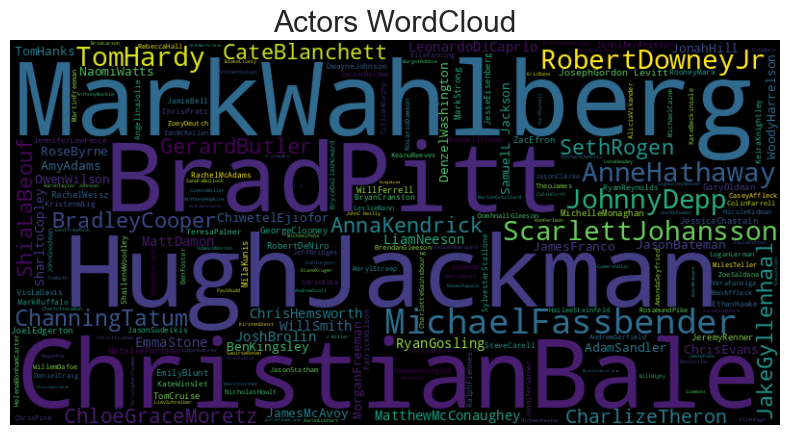

In [52]:
actors = df['Actors'].str.split(',').explode()

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='black',
    colormap='viridis'
).generate(" ".join(actors.str.replace(' ','')))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Actors WordCloud")
plt.show()

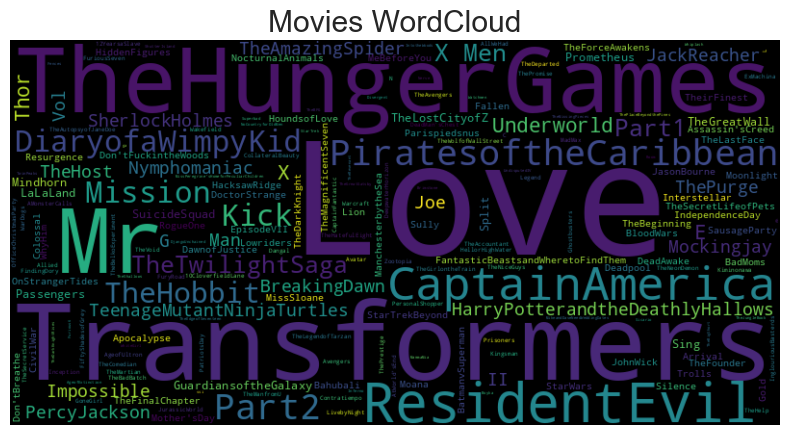

In [53]:
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='black',
    colormap='viridis'
).generate(" ".join(df['Title'].str.replace(' ', '')))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Movies WordCloud")
plt.show()